This analysis's main objective was to investigate the complex relationship between traders' actual trading activity and performance from the Hyperliquid historical data and market sentiment as indicated by the Fear & Greed Index. Our goal in combining these two datasets was to find trends that might result in more intelligent trading tactics.

**Step 1: Gathering and Combining Data**

We started by using two different datasets:

> Data from the Fear & Greed Index: A daily log of market sentiment that assigns a number to each day: "Fear," "Extreme Fear," "Neutral," "Greed," or "Extreme Greed."

> Historical Trader Data: A thorough record of every trade, including the size of the trade, the buy/sell direction, and the closed profit or loss (Closed PnL) for each one.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fear_greed_df = pd.read_csv('fear_greed_index.csv')
trader_data_df = pd.read_csv('historical_data.csv')
print("Fear and Greed Index Data:")
print(fear_greed_df.head())
print("\nHistorical Trader Data:")
print(trader_data_df.head())

Fear and Greed Index Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Historical Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy

We converted the date and time columns in both files into a standardized datetime format.

In [ ]:

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])


trader_data_df['Timestamp IST'] = pd.to_datetime(trader_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_data_df['date'] = trader_data_df['Timestamp IST'].dt.date
trader_data_df['date'] = pd.to_datetime(trader_data_df['date'])

print("Fear and Greed Index Info after Date Conversion:")
fear_greed_df.info()
print("\nTrader Data Info after Date Conversion:")
trader_data_df.info()

Fear and Greed Index Info after Date Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB

Trader Data Info after Date Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-nu

This made it possible for us to combine the two datasets on the 'date' column, resulting in a strong, cohesive dataset that connected each trade to the mood of the market on the day it happened.

In [ ]:

merged_df = pd.merge(trader_data_df, fear_greed_df, on='date', how='inner')

print("\nMerged Data:")
print(merged_df.head())


Merged Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID 

**Step 2: Key Findings from the Study**

We created a number of visualisations using the combined data to analyse the connection between trading and sentiment. The following are the complete conclusions drawn from them:

**First Insight: Extremes in Sentiment Increase Risk and Gain**

We started by looking at the connection between the Fear & Greed Index and daily profits (or losses).

> Key Finding: The scatter plot showed that the likelihood of both large profits and large losses rises sharply as market sentiment shifts towards the extremes, either "Extreme Fear" (a low index value) or "Extreme Greed" (a high index value).

> Interpretation: This suggests that high volatility is a hallmark of times when market sentiment is strong. Although astute traders may find great opportunities in this volatility, there is a much greater chance of losing money on a sudden market move. On the other hand, "Neutral" periods indicate a calmer, less volatile market because they show a much tighter, smaller PnL.

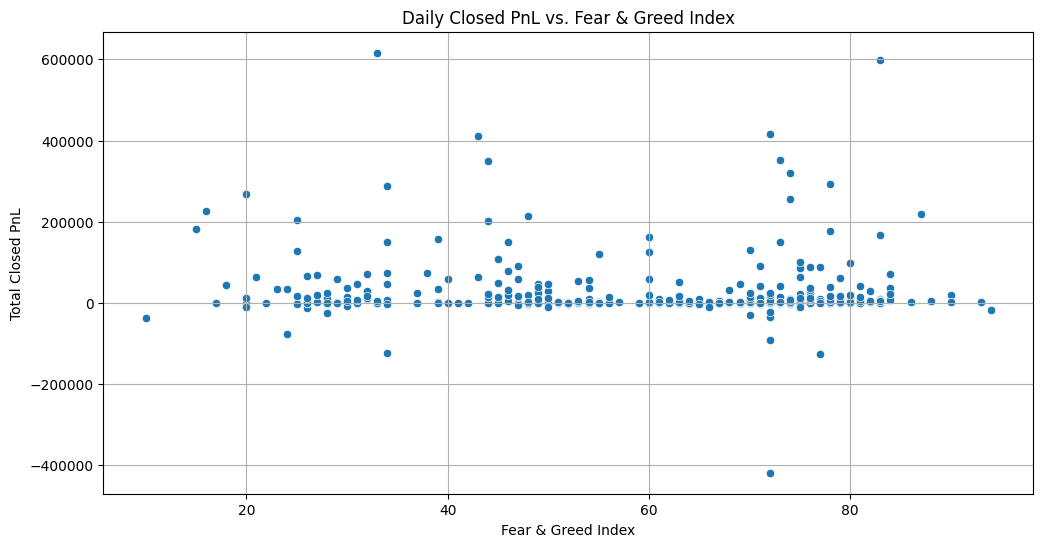

In [ ]:

daily_summary_df = merged_df.groupby('date').agg({
    'Closed PnL': 'sum',
    'value': 'first'
}).reset_index()


plt.figure(figsize=(12, 6))
sns.scatterplot(x='value', y='Closed PnL', data=daily_summary_df)
plt.title('Daily Closed PnL vs. Fear & Greed Index')
plt.xlabel('Fear & Greed Index')
plt.ylabel('Total Closed PnL')
plt.grid(True)
plt.savefig('pnl_vs_sentiment.png')


**Second Insight: Contrarianism's Profitability**

We then examined the sentiment conditions that, on average, yielded the highest profits for traders.

> Key Finding: A distinct pattern can be seen in the bar chart of average Closed PnL by sentiment category: traders were generally most successful during "Fear" and "Extreme Fear" periods.

> Interpretation: The well-known trading adage, "Be greedy when others are fearful," is powerfully validated by data. It implies that traders who are confident enough to enter the market during periods of low prices and widespread panic are frequently rewarded. Additionally, the data revealed that traders generally did worse during "Greed" periods, most likely as a result of buying into market tops (FOMO).



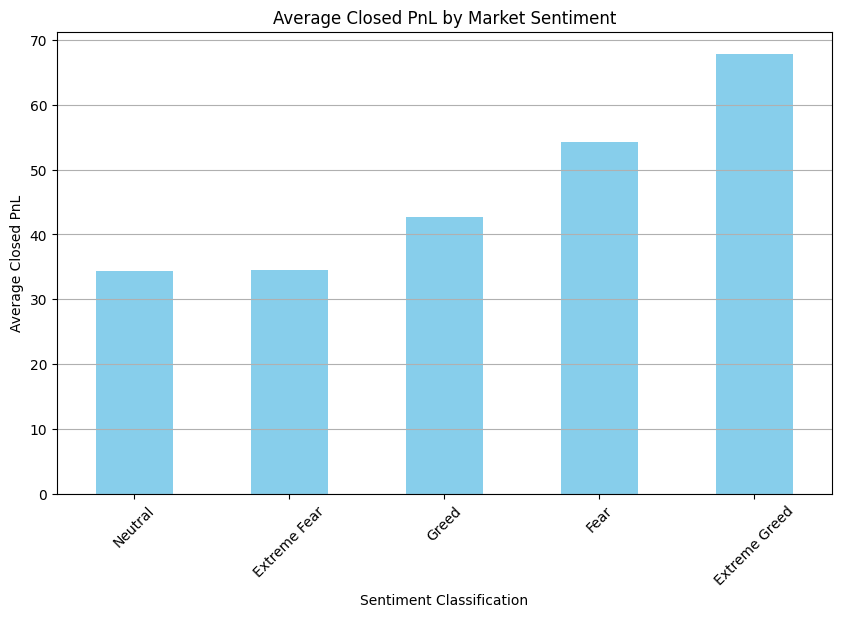

In [ ]:

pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()


plt.figure(figsize=(10, 6))
pnl_by_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('avg_pnl_by_sentiment.png')

**Third Insight: Fear Rather than Greed Drives Higher Trading Volume**

Next, we looked into how trading activity as a whole is affected by market sentiment.

> Key Finding: Both "Extreme Fear" and "Extreme Greed" are associated with spikes in trading volume (measured in Size USD). It's interesting to note that periods of "Extreme Fear" saw the highest trading volumes.

> Interpretation: This implies that panic, rather than euphoria, is a stronger driving force behind trading activity. A flurry of market activity during fearful times is probably caused by a combination of aggressive "dip-buying" by one group of traders and panic-selling by another.

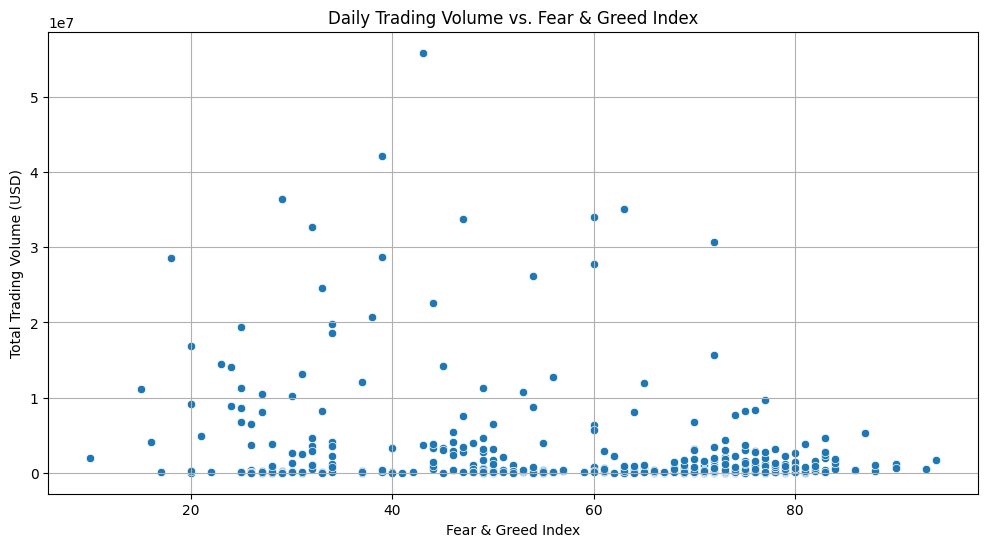

In [ ]:

daily_volume_df = merged_df.groupby('date').agg({
    'Size USD': 'sum',
    'value': 'first'
}).reset_index()
# Plotting trading volume against sentiment
plt.figure(figsize=(12, 6))
sns.scatterplot(x='value', y='Size USD', data=daily_volume_df)
plt.title('Daily Trading Volume vs. Fear & Greed Index')
plt.xlabel('Fear & Greed Index')
plt.ylabel('Total Trading Volume (USD)')
plt.grid(True)
plt.savefig('volume_vs_sentiment.png')

**Fourth Insight: The Dominant Strategy Is "Buying the Dip"**

Lastly, we examined the actual actions of traders during these various sentiment phases, including purchases and sales.

> Key Finding: A very strong behavioural pattern was identified by the analysis: traders are more likely to buy when they are experiencing "Fear" or "Extreme Fear."

> Interpretation: This indicates that the market as a whole is adopting a "buy the dip" strategy. The traders in this dataset collectively see fear-induced price declines as opportunities rather than panic-selling into downturns. The buying pressure during fear is the most prominent behavioural pattern seen, even though selling activity does increase during "Greed" periods (indicating some profit-taking).

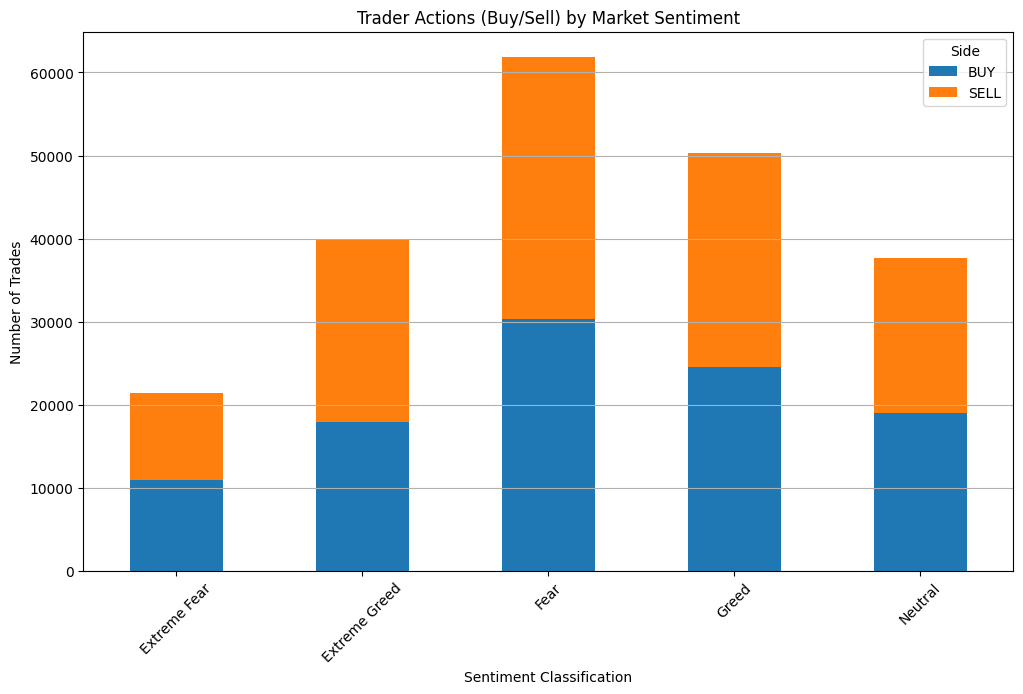

In [ ]:

sentiment_actions = merged_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)


sentiment_actions.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Trader Actions (Buy/Sell) by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.legend(title='Side')
plt.grid(axis='y')
plt.savefig('actions_by_sentiment.png')















**Step 3: Actionable Strategic Recommendations**

The following are the main strategic lessons for traders based on this thorough analysis:

> Adopt a Contrarian Mindset: There is compelling evidence from the data that contrarian strategies, particularly purchasing when the market is apprehensive, have historically produced positive returns. Overly greedy market sentiment should raise suspicions because it has been linked to lower average returns.

> Employ Sentiment as a Tool for Risk Management: The Fear & Greed Index serves as a stand-in for market volatility in addition to being a sentiment indicator. The index's extremes serve as a warning to be ready for more significant price fluctuations. Adapt your risk management and position sizes appropriately.Recognise Market Patterns: When contemplating entries during a downturn, knowing that the market generally has a tendency to "buy the dip" can give you confidence. It demonstrates that you are trading with a strong underlying market trend.

> Steer clear of Emotion-Driven Decisions: The analysis emphasises the risks associated with emotional trading. It can be harmful to panic sell when sentiment is low or to chase rallies when sentiment is high (FOMO). A methodical, data-driven approach is better.